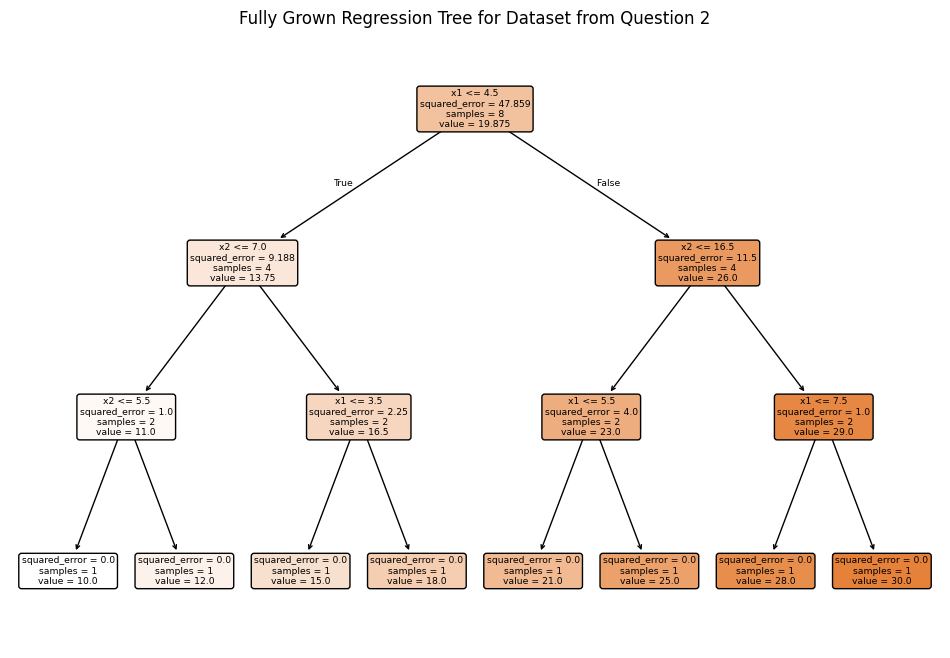

In [1]:
'''
230191
EE708 Assignment 4
QUESTION 7
'''
# Fully Grown Regression Tree using the Dataset from Question 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Defining the dataset from Q2
# x1: [1,2,3,4,5,6,7,8]
# x2: [5,6,8,10,12,15,18,20]
# y:  [10,12,15,18,21,25,28,30]
data = {
    'x1': [1, 2, 3, 4, 5, 6, 7, 8],
    'x2': [5, 6, 8, 10, 12, 15, 18, 20],
    'y':  [10, 12, 15, 18, 21, 25, 28, 30]
}

# Dataframe creation
df = pd.DataFrame(data)

# Separate features and target variable
X = df[['x1', 'x2']]
y = df['y']

# Create and fit a fully grown regression tree (with no restrictions on depth)
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X, y)

# Visualizing the fully grown regression tree
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, feature_names=['x1', 'x2'], filled=True, rounded=True)
plt.title('Fully Grown Regression Tree for Dataset from Question 2')
plt.show()


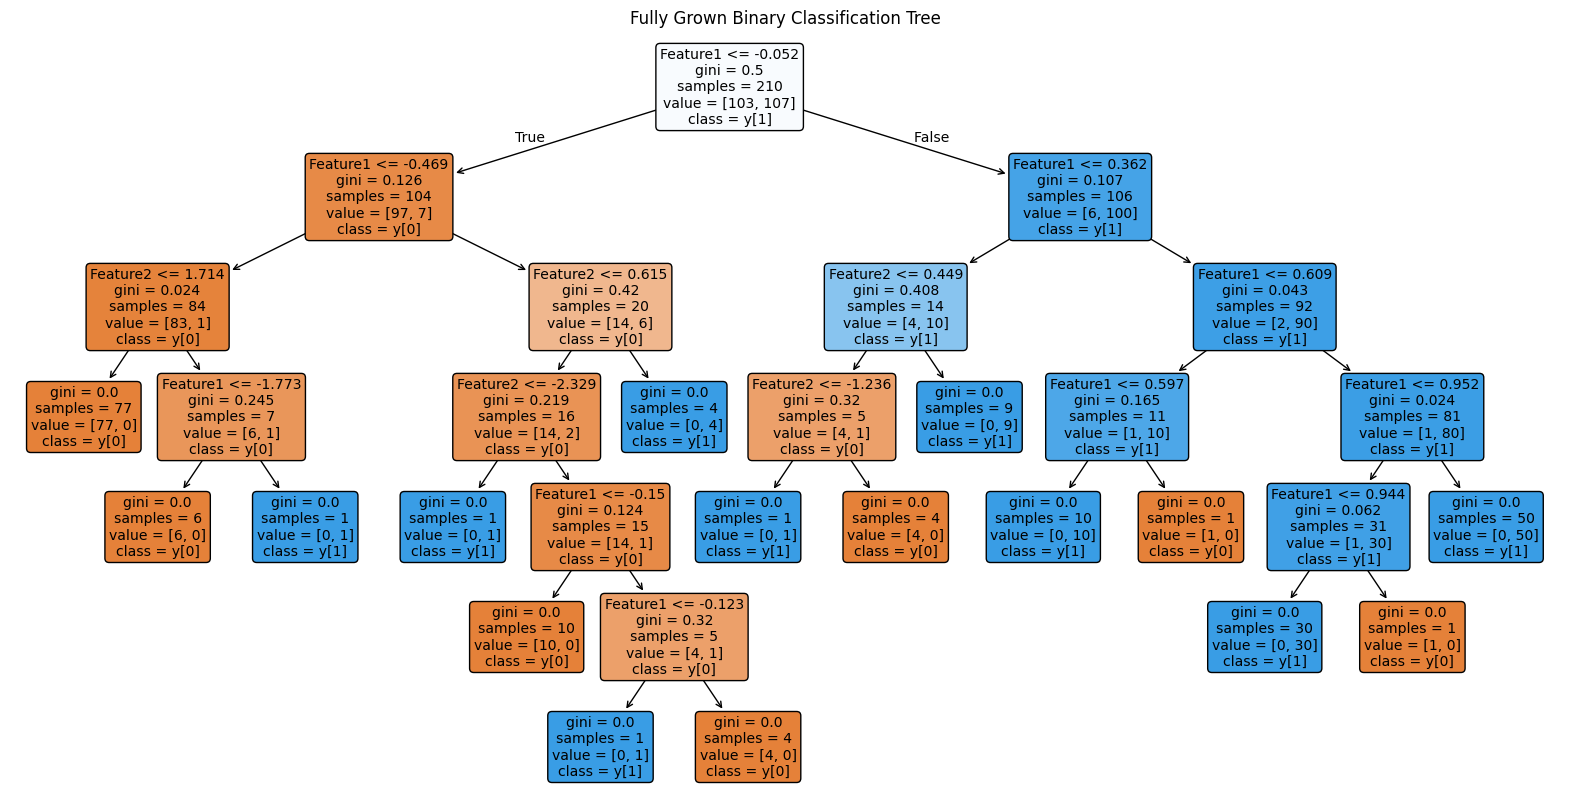

Depth | SSE
    1 | 9.0
    2 | 9.0
    3 | 4.0
    4 | 4.0
    5 | 4.0
    6 | 4.0


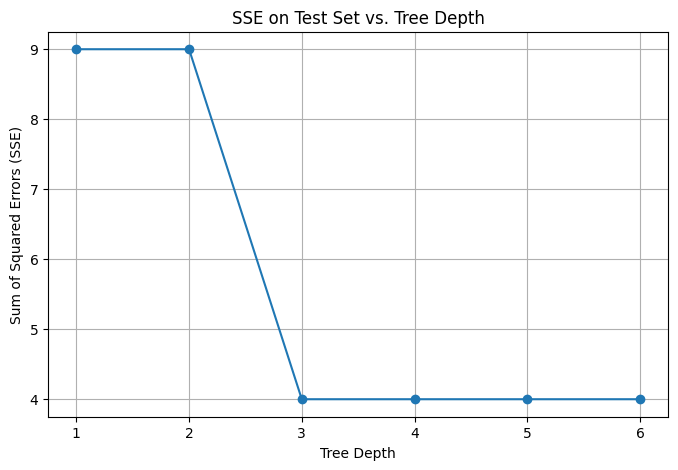

In [2]:
'''
230191
EE708 Assignment 4
QUESTION 8
'''

# Binary Classification Tree with Pruning and SSE Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the training and test datasets
train_df = pd.read_csv('A4_train.csv')
test_df = pd.read_csv('A4_test.csv')

# The CSV files have the following structure:
# Features in two columns and a binary target column named 'Label'
feature_cols = [col for col in train_df.columns if col != 'Label']

X_train = train_df[feature_cols]
y_train = train_df['Label']
X_test = test_df[feature_cols]
y_test = test_df['Label']

# (a) Train a fully grown binary classification tree using Gini impurity
clf_full = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_full.fit(X_train, y_train)

# Visualize the fully grown tree
plt.figure(figsize=(20,10))
plot_tree(clf_full, feature_names=feature_cols, class_names=True, filled=True, rounded=True)
plt.title('Fully Grown Binary Classification Tree')
plt.show()

# (b) Compute SSE on the test set at each depth.
max_depth = clf_full.tree_.max_depth
depths = list(range(1, max_depth + 1))
sse_values = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # For binary classification with 0/1 labels, SSE = sum((y_true - y_pred)^2)
    sse = np.sum((y_test - y_pred) ** 2)
    sse_values.append(sse)

# Printing the SSE values at each depth for inspection.
print("Depth | SSE")
for d, sse in zip(depths, sse_values):
    print(f"{d:5d} | {sse}")

# Plotting the variation of SSE with depth
plt.figure(figsize=(8, 5))
plt.plot(depths, sse_values, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE on Test Set vs. Tree Depth')
plt.grid(True)
plt.show()




Depth Change | |Delta SSE|
           2 | 0.0
           3 | 5.0
           4 | 0.0
           5 | 0.0
           6 | 0.0

Optimal pruning depth (minimal SSE change): 2


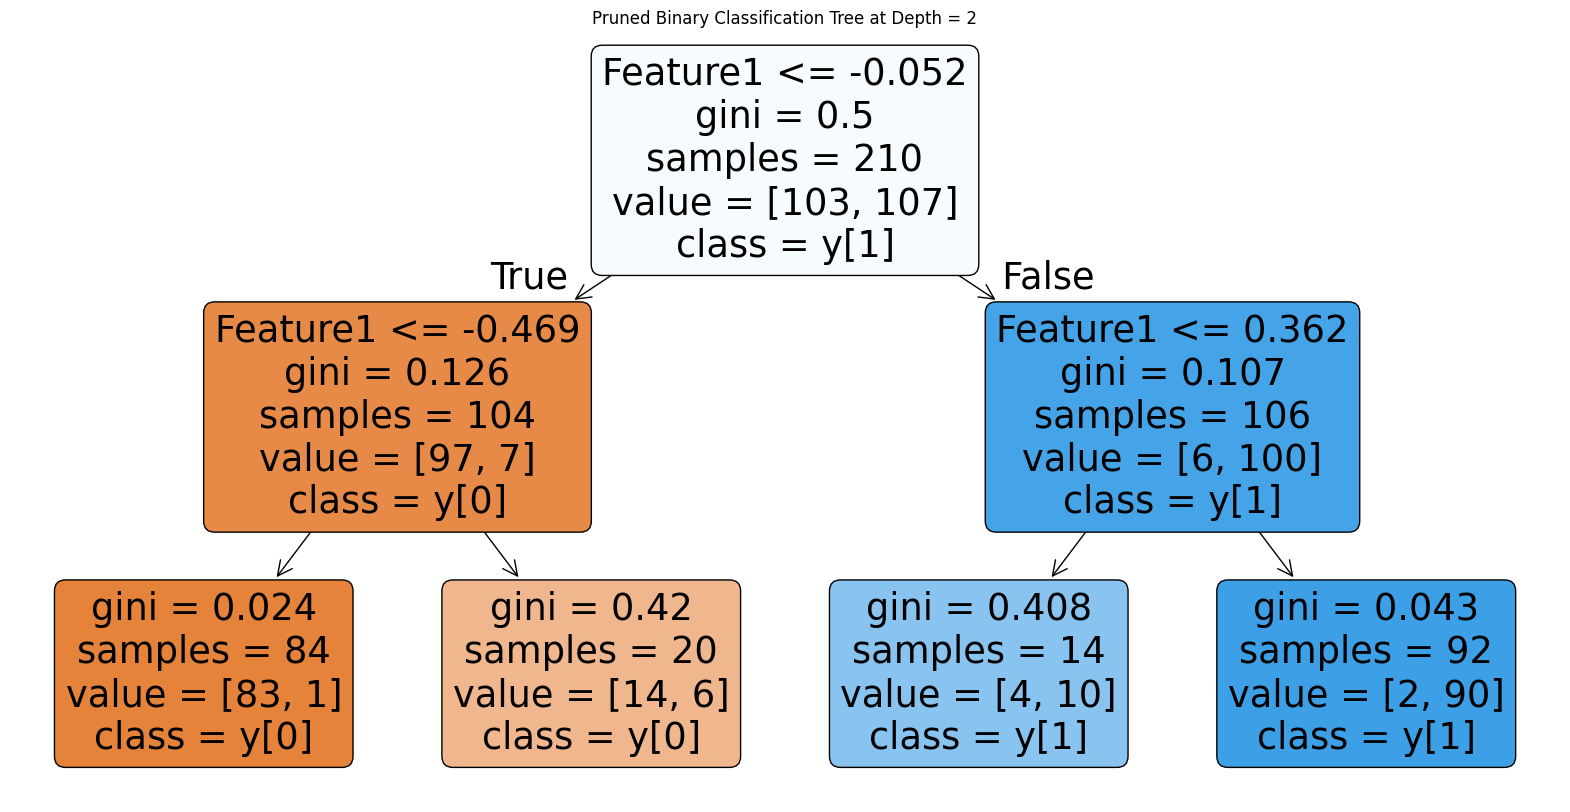

In [3]:
# Method 1: Using Python code to prune the tree

# (c) Determine the optimal pruning depth by selecting the depth where the change in SSE is minimal.
# Compute the absolute differences between successive SSE values.
sse_diff = np.abs(np.diff(sse_values))
print("\nDepth Change | |Delta SSE|")
for d, diff in zip(depths[1:], sse_diff):
    print(f"{d:12d} | {diff}")

# Select the depth at which the SSE change is minimal.
# Note: sse_diff[i] represents the change from depth i to i+1, so we add 1.
min_change_index = np.argmin(sse_diff)
optimal_depth = depths[min_change_index + 1]

print(f"\nOptimal pruning depth (minimal SSE change): {optimal_depth}")

# (d) Visualize the pruned tree at the optimal depth.
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf_pruned, feature_names=feature_cols, class_names=True, filled=True, rounded=True)
plt.title(f'Pruned Binary Classification Tree at Depth = {optimal_depth}')
plt.show()



Optimal pruning depth (minimal SSE change): 3


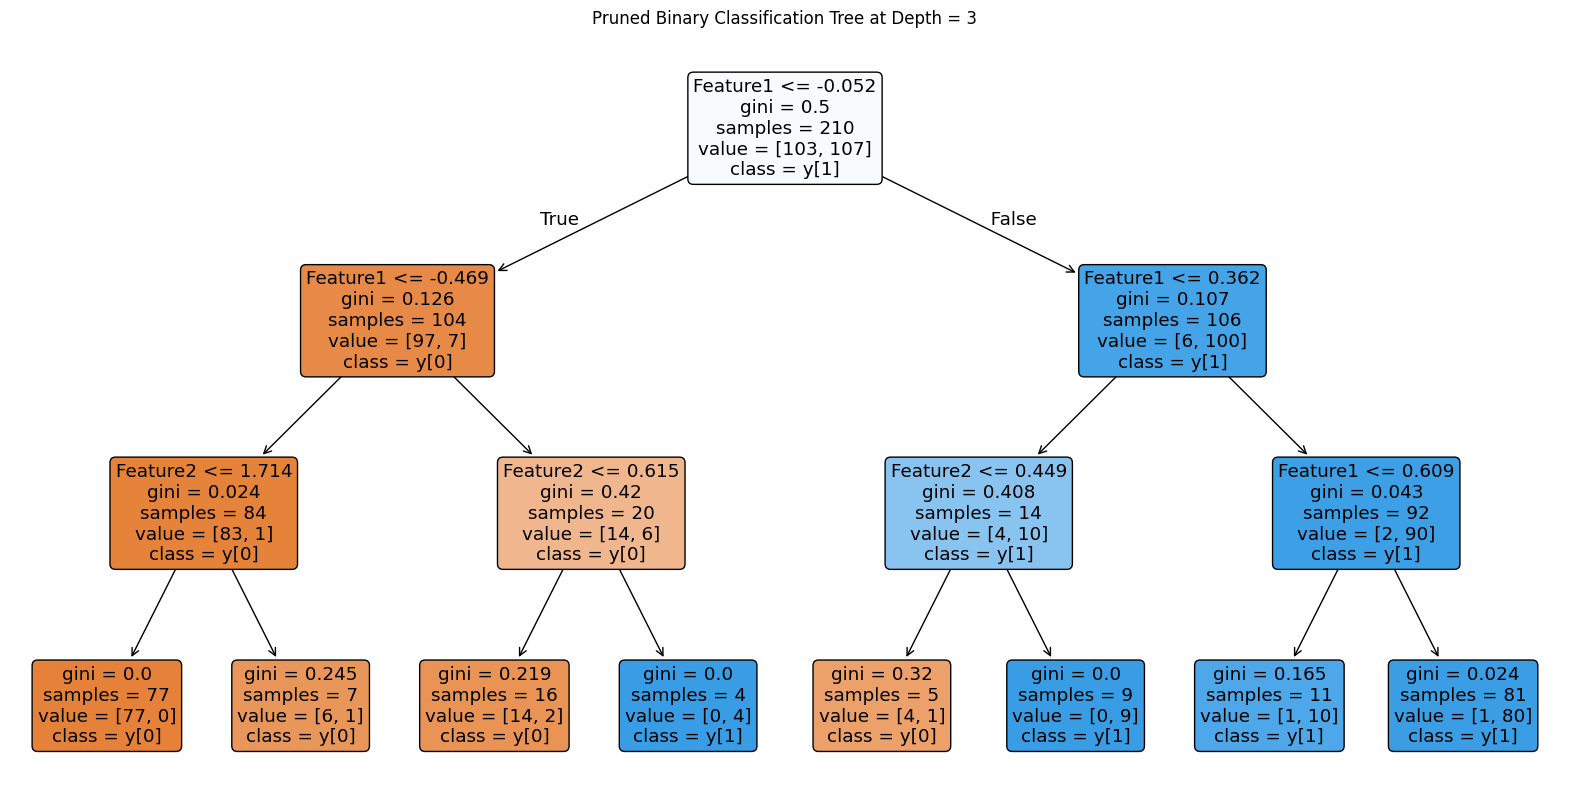

In [4]:
# Method 2: Deciding optimal length manually to prune the tree

# (c) Determine the optimal pruning depth by selecting the depth where the change in SSE is minimal.
# From the SSE vs Depth plot, it's evident that cutting the tree at the depth 3 is the best choice
# because from changing depth from 2 to 3, the most change in SSE happens.
# After 3 increasing depth or before 2 decreasing depth doesn't help to reduce the SSE as It remains constant.
# So even though method 1 shows the optimal depth has to be 2, by proper observation it seems it should be taken as 3
# to incorporate the significant reduction in SSE while increasing the depth from 2 to 3.
# Optimal depth = 3
optimal_depth = 3

print(f"\nOptimal pruning depth (minimal SSE change): {optimal_depth}")

# (d) Visualize the pruned tree at the optimal depth.
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf_pruned, feature_names=feature_cols, class_names=True, filled=True, rounded=True)
plt.title(f'Pruned Binary Classification Tree at Depth = {optimal_depth}')
plt.show()
